<a href="https://colab.research.google.com/github/JanMarcelKezmann/Animal-Classificator-Convolutional-Neural-Network/blob/master/Data_Augementation_on_Animal10_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Load Libraries

In [0]:
# Load all necessary libraries
import os
import cv2
import shutil
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

from keras.applications import InceptionV3, InceptionResNetV2
from keras.layers import Dense, Dropout, Flatten, MaxPooling2D, Conv2D
from keras import optimizers
from keras import models
from keras.callbacks import ModelCheckpoint, TensorBoard, ReduceLROnPlateau, EarlyStopping
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator

In [80]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [81]:
# just some information about the local folder structure
print(os.listdir())
print(os.listdir("drive"))
print(os.listdir("drive/My Drive"))
print(os.listdir("drive/My Drive/Animal10-Images"))

base_dir = "drive/My Drive/Animal10-Images/"
print(os.listdir(base_dir + "train"))
print(os.listdir(base_dir + "train/butterfly")[:3])
print(len(os.listdir(base_dir + "train/butterfly")))

['.config', 'drive', 'sample_data']
['My Drive', '.Trash']
['Colab Notebooks', 'Residual Network 50.ipynb', 'ResNetV2-164 MNIST.h5', 'Advanced Regression Techniques.ipynb', 'Starter Kernel for Segmentation 2 (1).ipynb', 'Tensorflow Keras Transfer Learning.ipynb', 'Data 1000 vs 1000', 'ISIC Detection Model.h5', 'Untitled0.ipynb', 'Animal10-Images', 'Inception_V3_ww.h5', 'Inception_ResNet_V2_ww.h5', 'ISIC Detection for Web App - Test.ipynb', 'CW Attack Tester.ipynb', 'Uber-Lyft-Cab-Prices']
['train', 'val', 'test', '.ipynb_checkpoints', 'Inception_V3_ww.h5', 'Inception_ResNet_V2_ww.h5', 'Data Augementation on Animal10 Dataset.ipynb']
['horse', 'elephant', 'chicken', 'squirrel', 'butterfly', 'cat', 'cow', 'sheep', 'dog', 'spider']
['e030b20928e90021d85a5854ee454296eb70e3c818b413449df6c87ca3ed_640.jpg', 'e030b20929e90021d85a5854ee454296eb70e3c818b413449df6c87ca3ed_640.jpg', 'e030b2092be90021d85a5854ee454296eb70e3c818b413449df6c87ca3ed_640.jpg']
1000


## Creating Directories

### NOTE: Before the model and data was uploaded the "creating directories" step was executed.
###       Since the whole data was uploaded appropriatly this step becomes irrelevant.
###       Anyway if you train everything localy then this is necessary to create the correct directories.

<p>Since the used images have names which are not numerically listed, we have to save the names. We will use them when creating new directories and copying each files into the right directory</p>

In [0]:
butterfly_imgs = os.listdir("butterfly")
cat_imgs = os.listdir("cat")
chicken_imgs = os.listdir("chicken")
cow_imgs = os.listdir("cow")
dog_imgs = os.listdir("dog")
elephant_imgs = os.listdir("elephant")
horse_imgs = os.listdir("horse")
sheep_imgs = os.listdir("sheep")
spider_imgs = os.listdir("spider")
squirrel_imgs = os.listdir("squirrel")

<p>Create Training, Validation and Testing Directory with folders for each imageclass in it. Since we have 10 different animal species we have to create another 10 folders in each of the previously three created directories, to store the images in</p>
<p>Further, because the smallest dataset "elephants" only contains 1483 images in total, we will orientate the folder sizes based on this dataset size. This means in each animal training folder there will be 1000 training images, in each animal validation folder 240 validation images and in each animal testing folder another 240 testing images.</p>

In [0]:
# create the training, validation and testing directory
train_dir = "train"
os.mkdir(train_dir)

val_dir = "val"
os.mkdir(val_dir)

test_dir = "test"
os.mkdir(test_dir)


# create the animal species folder in each of the training, validation
# and testing directory
train_butterfly_dir = os.path.join(train_dir, "butterfly")
os.mkdir(train_butterfly_dir)

train_cat_dir = os.path.join(train_dir, "cat")
os.mkdir(train_cat_dir)

train_chicken_dir = os.path.join(train_dir, "chicken")
os.mkdir(train_chicken_dir)

train_cow_dir = os.path.join(train_dir, "cow")
os.mkdir(train_cow_dir)

train_dog_dir = os.path.join(train_dir, "dog")
os.mkdir(train_dog_dir)

train_elephant_dir = os.path.join(train_dir, "elephant")
os.mkdir(train_elephant_dir)

train_horse_dir = os.path.join(train_dir, "horse")
os.mkdir(train_horse_dir)

train_sheep_dir = os.path.join(train_dir, "sheep")
os.mkdir(train_sheep_dir)

train_spider_dir = os.path.join(train_dir, "spider")
os.mkdir(train_spider_dir)

train_squirrel_dir = os.path.join(train_dir, "squirrel")
os.mkdir(train_squirrel_dir)



val_butterfly_dir = os.path.join(val_dir, "butterfly")
os.mkdir(val_butterfly_dir)

val_cat_dir = os.path.join(val_dir, "cat")
os.mkdir(val_cat_dir)

val_chicken_dir = os.path.join(val_dir, "chicken")
os.mkdir(val_chicken_dir)

val_cow_dir = os.path.join(val_dir, "cow")
os.mkdir(val_cow_dir)

val_dog_dir = os.path.join(val_dir, "dog")
os.mkdir(val_dog_dir)

val_elephant_dir = os.path.join(val_dir, "elephant")
os.mkdir(val_elephant_dir)

val_horse_dir = os.path.join(val_dir, "horse")
os.mkdir(val_horse_dir)

val_sheep_dir = os.path.join(val_dir, "sheep")
os.mkdir(val_sheep_dir)

val_spider_dir = os.path.join(val_dir, "spider")
os.mkdir(val_spider_dir)

val_squirrel_dir = os.path.join(val_dir, "squirrel")
os.mkdir(val_squirrel_dir)



test_butterfly_dir = os.path.join(test_dir, "butterfly")
os.mkdir(test_butterfly_dir)

test_cat_dir = os.path.join(test_dir, "cat")
os.mkdir(test_cat_dir)

test_chicken_dir = os.path.join(test_dir, "chicken")
os.mkdir(test_chicken_dir)

test_cow_dir = os.path.join(test_dir, "cow")
os.mkdir(test_cow_dir)

test_dog_dir = os.path.join(test_dir, "dog")
os.mkdir(test_dog_dir)

test_elephant_dir = os.path.join(test_dir, "elephant")
os.mkdir(test_elephant_dir)

test_horse_dir = os.path.join(test_dir, "horse")
os.mkdir(test_horse_dir)

test_sheep_dir = os.path.join(test_dir, "sheep")
os.mkdir(test_sheep_dir)

test_spider_dir = os.path.join(test_dir, "spider")
os.mkdir(test_spider_dir)

test_squirrel_dir = os.path.join(test_dir, "squirrel")
os.mkdir(test_squirrel_dir)

# create a list with all animal images categorized and orderd by animals
# to access the to be copied images 
animal_imgs = [butterfly_imgs, cat_imgs, chicken_imgs, cow_imgs, dog_imgs,
       elephant_imgs, horse_imgs, sheep_imgs, spider_imgs, squirrel_imgs]
# create a list with all animalspecies to create later on an appropriate
# folder name
animals = ["butterfly", "cat", "chicken", "cow", "dog", "elephant",
          "horse", "sheep", "spider", "squirrel"]

# create lists for all destination folder to copy the files into
train_dirs = [train_butterfly_dir, train_cat_dir, train_chicken_dir,
             train_cow_dir, train_dog_dir, train_elephant_dir,
             train_horse_dir, train_sheep_dir, train_spider_dir,
             train_squirrel_dir]

val_dirs = [val_butterfly_dir, val_cat_dir, val_chicken_dir, val_cow_dir,
           val_dog_dir, val_elephant_dir, val_horse_dir, val_sheep_dir,
           val_spider_dir, val_squirrel_dir]

test_dirs = [test_butterfly_dir, test_cat_dir, test_chicken_dir,
            test_cow_dir, test_dog_dir, test_elephant_dir, test_horse_dir,
            test_sheep_dir, test_spider_dir, test_squirrel_dir]

# copy the images into their correct folder
count = 0
for imgs in animal_imgs:
    fnames = [imgs[i] for i in range(1000)]
    for fname in fnames:
        src = os.path.join(animals[count], fname)
        dst = os.path.join(train_dirs[count], fname)
        shutil.copyfile(src, dst)

    fnames = [imgs[i] for i in range(1000, 1240)]
    for fname in fnames:
        src = os.path.join(animals[count], fname)
        dst = os.path.join(val_dirs[count], fname)
        shutil.copyfile(src, dst)

    fnames = [imgs[i] for i in range(1240, 1480)]
    for fname in fnames:
        src = os.path.join(animals[count], fname)
        dst = os.path.join(test_dirs[count], fname)
        shutil.copyfile(src, dst)
    
    count += 1

<p>Now all images have been copied into their associated folder.</p>
<p>This means we are now able to continue with the Data Exploration
    and Data Augmentation before we start building the model and 
    compiling it for the training process.</p>

## Data Exploration

<p>Starting off by picking 3 random images to get a feeling for the
    sizes and colors used. Further we will look if the features are
    scaled properly. If not then are going to correct this in the 
    Data Augmentation part.</p>

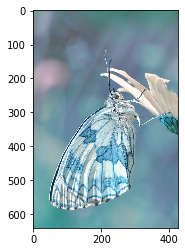

uint8


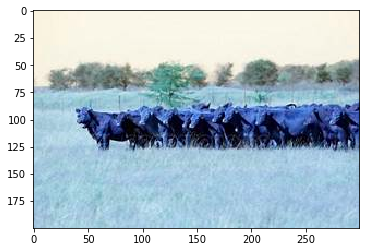

uint8


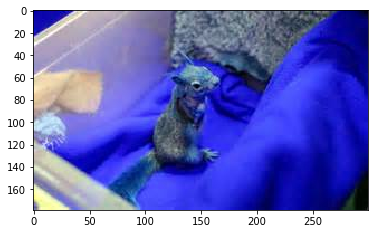

uint8


In [84]:
# save the image sources for the to be displayed images
test_img_src = []
test_img_src.append(base_dir + "train/butterfly/" + os.listdir(base_dir + "train/butterfly")[0])
test_img_src.append(base_dir + "train/cow/" + os.listdir(base_dir + "train/cow")[0])
test_img_src.append(base_dir + "train/squirrel/" + os.listdir(base_dir + "train/squirrel")[0])

for img in test_img_src:
    test_img = cv2.imread(img)
    plt.imshow(test_img)
    plt.show()
    print(test_img.dtype)

<p>Okay, so now we know that each image has a different size and the pixel values are saved as an integer. This means that we have to resize the images and scale the correctly between 0 and 1.</p>

## Data Augmentation

<p>First we just make a basic ImageDataGenerator that only scales the images properly for the model. Second we implented a more advanced ImageDataGenerator which should result in a much less overfitted model due to the partly huge differences in the images. This means that the model should get very flexibel in detecting a specific kind of species.</p>

<p>The advaned ImageDataGenerator in detail:
    
    - featurewise_center: Scales the pixel values to have a zero mean
    
    - featurewise_std_normalization: Standardize all pixel values around the mean
    
    - rotation_range: The Degree of the range for random image rotations
    
    - width_shift_range: Random Image Shift up to (-width_shift_range, +width_shift_range) percent of the total image pixels
    
    - height_shiftrange: Analog to width_shift_range for height
    
    - brightness_range: Range of image brightness with (dimmest, brightest) between 0 and 1 as a list
    
    - shear_range: Deviation angle in radians between horizontal line in the original picture and the image
    
    - zoom_range: Maximum zoom factor
    
    - horizontal_flip: Boolean, to flip or not flip random images horizontally
    
    - fill_mode: Filling options for shifted and rotated images
    
    - cval: Constant for filling constant if fill_mode="constant"
</p>
<p>The validation and testing datasets do not need to be transformed in any kind of way, since major transoformations would probably only lower the validation/testing accuracy. Therefore they are only scaled properly</p>

In [0]:
# This is the basic ImageDataGenerator to get the model running
train_datagen1 = ImageDataGenerator(rescale=1./255,
                                   samplewise_center=True,
                                   samplewise_std_normalization=True,
                                   zoom_range=0.2,
                                   horizontal_flip=True)

# Here is the more advanced ImageDataGenerator
train_datagen2 = ImageDataGenerator(rescale=1./255,
#                                      featurewise_center=True,
#                                      featurewise_std_normalization=True,
                                     rotation_range=40,
                                     width_shift_range=0.15,
                                     height_shift_range=0.15,
                                     brightness_range=(0.5, 1.0),
                                     shear_range=0.2,
                                     zoom_range=0.2,
                                     horizontal_flip=True,
                                     fill_mode="constant",
                                     cval=0)

# Validation and Testing Generators
val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

<p>Create Batch Generator with transformed data from the generator. The data will be resized properly with the defind interpolation algorithm. Further the batch size as well as the class mode need to be defined. You could change the color mode as well as shuffling the data or save it in a specific directory.</p>

In [0]:
train_dir = base_dir + "train/"
val_dir = base_dir + "val/"
test_dir = base_dir + "test/"

In [87]:
img_width, img_height = 150, 150

train_generator1 = train_datagen1.flow_from_directory(train_dir,
                                                   target_size=(img_height, img_width),
                                                   interpolation="nearest",
                                                   batch_size=50,
                                                   shuffle=True,
                                                   seed=0,
                                                   class_mode="categorical")

train_generator2 = train_datagen2.flow_from_directory(train_dir,
                                                   target_size=(img_height, img_width),
                                                   interpolation="nearest",
                                                   batch_size=50,
                                                   shuffle=True,
                                                   seed=0,
                                                   class_mode="categorical")

val_generator = val_datagen.flow_from_directory(val_dir,
                                                 target_size=(img_height, img_width),
                                                 interpolation="nearest",
                                                 batch_size=40,
                                                 shuffle=True,
                                                 seed=0,
                                                 class_mode="categorical")

test_generator = test_datagen.flow_from_directory(test_dir,
                                                 target_size=(img_height, img_width),
                                                 interpolation="nearest",
                                                 batch_size=40,
                                                 shuffle=True,
                                                 seed=0,
                                                 class_mode="categorical")


Found 10000 images belonging to 10 classes.
Found 10000 images belonging to 10 classes.
Found 2400 images belonging to 10 classes.
Found 2400 images belonging to 10 classes.


In [116]:
for i in train_generator1:
    # print(i[0])
    print(i[0].shape)
    # print(i[1])
    print(i[1].shape)
    break

(50, 150, 150, 3)
(50, 10)


In [89]:
print(train_generator1.class_indices)
print(val_generator.class_indices)
print(test_generator.class_indices)

{'butterfly': 0, 'cat': 1, 'chicken': 2, 'cow': 3, 'dog': 4, 'elephant': 5, 'horse': 6, 'sheep': 7, 'spider': 8, 'squirrel': 9}
{'butterfly': 0, 'cat': 1, 'chicken': 2, 'cow': 3, 'dog': 4, 'elephant': 5, 'horse': 6, 'sheep': 7, 'spider': 8, 'squirrel': 9}
{'butterfly': 0, 'cat': 1, 'chicken': 2, 'cow': 3, 'dog': 4, 'elephant': 5, 'horse': 6, 'sheep': 7, 'spider': 8, 'squirrel': 9}


## Loading the Model

<p>Here we could implement a model by ourselves too, but since their are so many well tested models out there it is, at least for this kind of images classfication, not necessary to create an own one.</p>
<p>We will test here two different models: InceptionV3 and InceptionResNetV2. Both will be tested with imagenet pretrained layers and without pretraining, to compare the effect on pretraining on different models.</p>
<p>Lastly we will choose the better model and fine-tune a couple of layers to get even better results.</p>

In [90]:
# # Model 1: Inception V3 without wheigts
# model_v3_wow = models.Sequential()
# conv_base_v3_wow = InceptionV3(weights=None, include_top=False,
#                        input_shape=(img_height, img_width, 3))

# model_v3_wow.add(conv_base_v3_wow)
# model_v3_wow.add(Flatten())
# model_v3_wow.add(Dense(256, activation="relu"))
# model_v3_wow.add(Dense(10, activation="softmax"))

# conv_base_v3_wow.trainable = True

# print(model_v3_wow.summary())
# print("\n\n")

# Model 2: Inception V3 with wheigts
model_v3_ww = models.Sequential()
conv_base_v3_ww = InceptionV3(weights="imagenet", include_top=False,
                       input_shape=(img_height, img_width, 3))

model_v3_ww.add(conv_base_v3_ww)
model_v3_ww.add(Flatten())
model_v3_ww.add(Dense(256, activation="relu"))
model_v3_ww.add(Dense(10, activation="softmax"))

conv_base_v3_ww.trainable = False

print(model_v3_ww.summary())
print("\n\n")

# # Model 3: Inception ResNet V2 without wheigts
# model_v2_wow = models.Sequential()
# conv_base_v2_wow = InceptionResNetV2(weights=None, include_top=False,
#                        input_shape=(img_height, img_width, 3))

# model_v2_wow.add(conv_base_v2_wow)
# model_v2_wow.add(Flatten())
# model_v2_wow.add(Dense(256, activation="relu"))
# model_v2_wow.add(Dense(10, activation="softmax"))

# conv_base_v2_wow.trainable = True

# print(model_v2_wow.summary())
# print("\n\n")

# Model 4: Inception ResNet V2 with weights
model_v2_ww = models.Sequential()
conv_base_v2_ww = InceptionResNetV2(weights="imagenet", include_top=False,
                       input_shape=(img_height, img_width, 3))

model_v2_ww.add(conv_base_v2_ww)
model_v2_ww.add(Flatten())
model_v2_ww.add(Dense(256, activation="relu"))
model_v2_ww.add(Dense(10, activation="softmax"))

conv_base_v2_ww.trainable = False

print(model_v2_ww.summary())
print("\n\n")

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inception_v3 (Model)         (None, 3, 3, 2048)        21802784  
_________________________________________________________________
flatten_7 (Flatten)          (None, 18432)             0         
_________________________________________________________________
dense_13 (Dense)             (None, 256)               4718848   
_________________________________________________________________
dense_14 (Dense)             (None, 10)                2570      
Total params: 26,524,202
Trainable params: 4,721,418
Non-trainable params: 21,802,784
_________________________________________________________________
None



Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inception_resnet_v2 (Model)  (None, 3, 3, 1536)        54336736  
____

#### Model Compiling

In [0]:
# checkpoint = ModelCheckpoint(model_file, monitor = 'val_acc', save_best_only = True)
early_stopping = EarlyStopping(monitor = 'val_loss', patience = 8, verbose = 1, restore_best_weights = True)
# tensorboard = TensorBoard(log_dir = log_dir, batch_size = batch_size, update_freq = 'batch')
reduce_lr = ReduceLROnPlateau(monitor= 'val_loss', patience = 3, cooldown = 2, min_lr = 0.00000001, verbose = 1)

callbacks = [early_stopping, reduce_lr]

In [0]:
# model_v3_wow.compile(loss="categorical_crossentropy",
#                      optimizer=optimizers.RMSprop(lr=1e-3),
#                      metrics=["acc"])

model_v3_ww.compile(loss="categorical_crossentropy",
                     optimizer=optimizers.RMSprop(lr=1e-3),
                     metrics=["acc"])

# model_v2_wow.compile(loss="categorical_crossentropy",
#                      optimizer=optimizers.RMSprop(lr=1e-3),
#                      metrics=["acc"])

model_v2_ww.compile(loss="categorical_crossentropy",
                     optimizer=optimizers.RMSprop(lr=1e-3),
                     metrics=["acc"])

In [93]:
# history_v3_wow = model_v3_wow.fit_generator(train_generator1,
#                                      steps_per_epoch=50,
#                                      epochs=70,
#                                      validation_data=val_generator,
#                                      validation_steps=50,
#                                      verbose=1,
#                                      callbacks=callbacks)

history_v3_ww = model_v3_ww.fit_generator(train_generator1,
                                        steps_per_epoch=50,
                                        epochs=70,
                                        validation_data=val_generator,
                                        validation_steps=20,
                                        verbose=1,
                                        callbacks=callbacks)

# history_v2_wow = model_v2_wow.fit_generator(train_generator1,
#                                      steps_per_epoch=50,
#                                      epochs=70,
#                                      validation_data=val_generator,
#                                      validation_steps=20,
#                                      verbose=1,
#                                      callbacks=callbacks)

history_v2_ww = model_v2_ww.fit_generator(train_generator1,
                                        steps_per_epoch=50,
                                        epochs=70,
                                        validation_data=val_generator,
                                        validation_steps=20,
                                        verbose=1,
                                        callbacks=callbacks)

Epoch 1/70
50/50 [==============================] - 70s 1s/step - loss: 7.2024 - acc: 0.2632 - val_loss: 7.7407 - val_acc: 0.4213
Epoch 2/70
50/50 [==============================] - 22s 434ms/step - loss: 3.0186 - acc: 0.4872 - val_loss: 2.4330 - val_acc: 0.6862
Epoch 3/70
50/50 [==============================] - 26s 523ms/step - loss: 1.4776 - acc: 0.6112 - val_loss: 1.5665 - val_acc: 0.7875
Epoch 4/70
50/50 [==============================] - 27s 534ms/step - loss: 1.3769 - acc: 0.6232 - val_loss: 1.3752 - val_acc: 0.8050
Epoch 5/70
50/50 [==============================] - 26s 523ms/step - loss: 1.1350 - acc: 0.6732 - val_loss: 2.3633 - val_acc: 0.7213
Epoch 6/70
50/50 [==============================] - 26s 513ms/step - loss: 1.0604 - acc: 0.6804 - val_loss: 1.3402 - val_acc: 0.8175
Epoch 7/70
50/50 [==============================] - 26s 511ms/step - loss: 1.0575 - acc: 0.6812 - val_loss: 1.4566 - val_acc: 0.7850
Epoch 8/70
50/50 [==============================] - 27s 532ms/step - los


Model: Inception V3 with weights



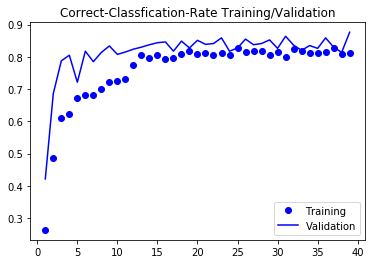

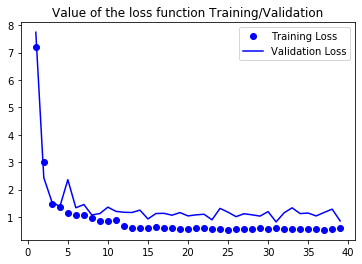


Model: Inception ResNet V2 without weights



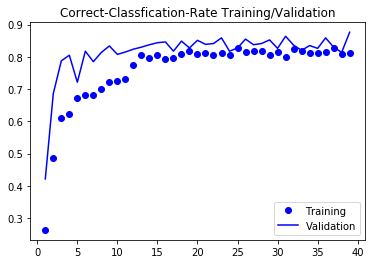

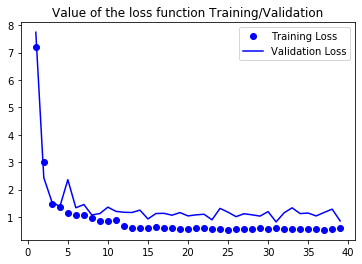

In [94]:
# histories_all = [history_v3_wow, history_v3_ww, history_v3_wow, history_v3_ww]
histories_ww = [history_v3_ww, history_v3_ww]
# models_all = ["Inception V3 without weights", "Inception V3 with weights", "Inception ResNet V2 without weights", "Inception ResNet V2 with weights"]
models_ww = ["Inception V3 with weights", "Inception ResNet V2 without weights"]

count = 0
for history in histories_ww:
    print("\nModel: " + models_ww[count] + "\n")
    
    acc = history.history["acc"]
    val_acc = history.history["val_acc"]
    loss = history.history["loss"]
    val_loss = history.history["val_loss"]

    epochs = range(1, len(acc) + 1)

    plt.plot(epochs, acc, "bo", label="Training")
    plt.plot(epochs, val_acc, "b", label="Validation")
    plt.title("Correct-Classfication-Rate Training/Validation")
    plt.legend()

    plt.figure()

    plt.plot(epochs, loss, "bo", label="Training Loss")
    plt.plot(epochs, val_loss, "b", label="Validation Loss")
    plt.title("Value of the loss function Training/Validation")
    plt.legend()

    plt.show()
    
    count += 1

<p>As a result we can sum up that especially the pretrained models succeeded in classifying the animal species correctly. On the other hand the not pretrained models went pretty badly and should not be used further.</p>
<p>Now it is time to fine tune the pretrained models, trying to get even at least a little bit better. To do that we will set the last block of each of the two models to "trainable" and try to optimize in that direction to make it a bit more flexible.</p>
<p>But even if this should not make our predictions better, we can be happy with over 90% validation accuracy.</p>

### Fine-Tune the best Model

<p>Set the "set_trainable" of the last block of the best model to True. With that some minor changes within the model can be made and it should result in slightly better validation results.</p>

In [0]:
conv_base_v3_ww.trainable = True
set_trainable = False

for layer in conv_base_v3_ww.layers:
    if layer.name == "conv2d_1354":
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False

conv_base_v2_ww.trainable = True
set_trainable = False

for layer in conv_base_v2_ww.layers:
    if layer.name == "conv2d_1737":
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False

In [0]:
model_v3_ww.compile(loss="categorical_crossentropy",
                   optimizer=optimizers.RMSprop(lr=1e-3),
                   metrics=["acc"])

model_v2_ww.compile(loss="categorical_crossentropy",
                     optimizer=optimizers.RMSprop(lr=1e-3),
                     metrics=["acc"])

In [119]:
history_v3_ww_ft = model_v3_ww.fit_generator(train_generator1,
                                            steps_per_epoch=50,
                                            epochs=70,
                                            validation_data=val_generator,
                                            validation_steps=20,
                                            verbose=1,
                                            callbacks=callbacks)

history_v2_ww_ft = model_v2_ww.fit_generator(train_generator1,
                                            steps_per_epoch=50,
                                            epochs=70,
                                            validation_data=val_generator,
                                            validation_steps=20,
                                            verbose=1,
                                            callbacks=callbacks)

Epoch 1/70
50/50 [==============================] - 71s 1s/step - loss: 1.1106 - acc: 0.7204 - val_loss: 1.7143 - val_acc: 0.4350
Epoch 2/70
50/50 [==============================] - 23s 459ms/step - loss: 0.7760 - acc: 0.7684 - val_loss: 2.1383 - val_acc: 0.3750
Epoch 3/70
50/50 [==============================] - 27s 547ms/step - loss: 0.8149 - acc: 0.7524 - val_loss: 1.9132 - val_acc: 0.3975
Epoch 4/70
50/50 [==============================] - 27s 546ms/step - loss: 0.7603 - acc: 0.7580 - val_loss: 1.8985 - val_acc: 0.3925

Epoch 00004: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.
Epoch 5/70
50/50 [==============================] - 23s 460ms/step - loss: 0.6128 - acc: 0.8068 - val_loss: 1.7920 - val_acc: 0.4263
Epoch 6/70
50/50 [==============================] - 27s 549ms/step - loss: 0.5752 - acc: 0.8128 - val_loss: 1.7820 - val_acc: 0.4425
Epoch 7/70
50/50 [==============================] - 27s 541ms/step - loss: 0.5491 - acc: 0.8244 - val_loss: 1.8879 - val_ac

<p>Compare the accuracies of of the previously best model to the fine-tuned one</p>


Model: Inception V3 with weights fine-tuned



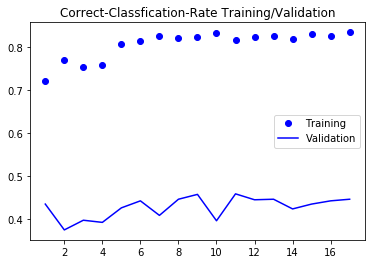

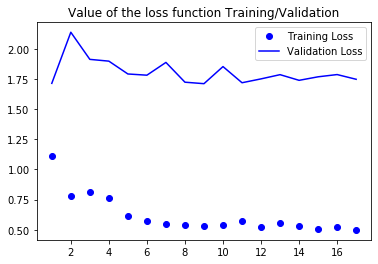


Model: Inception ResNet V2 with weights fine-tuned



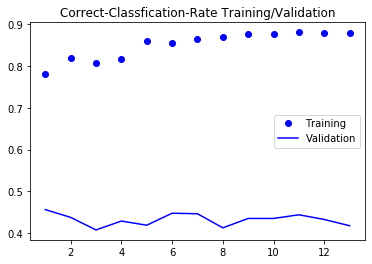

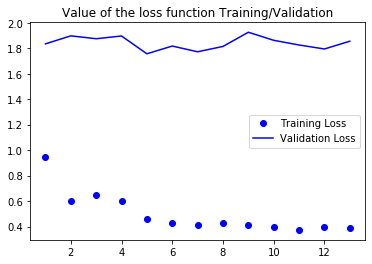

In [120]:
histories = [history_v3_ww_ft, history_v2_ww_ft]
models = ["Inception V3 with weights fine-tuned", "Inception ResNet V2 with weights fine-tuned"]
count = 0

for history in histories:
    print("\nModel: " + models[count] + "\n")
    
    acc = history.history["acc"]
    val_acc = history.history["val_acc"]
    loss = history.history["loss"]
    val_loss = history.history["val_loss"]

    epochs = range(1, len(acc) + 1)

    plt.plot(epochs, acc, "bo", label="Training")
    plt.plot(epochs, val_acc, "b", label="Validation")
    plt.title("Correct-Classfication-Rate Training/Validation")
    plt.legend()

    plt.figure()

    plt.plot(epochs, loss, "bo", label="Training Loss")
    plt.plot(epochs, val_loss, "b", label="Validation Loss")
    plt.title("Value of the loss function Training/Validation")
    plt.legend()

    plt.show()
    
    count += 1

<p>So in conclusion due to the fine-tuning only the Inception V3 model improved a lot, from roughly 85 % up to over 87 %. Even though the Inception ResNet V2 model did not improved it did not lose any accuracy either, so it does not matter which one we will use in the end.</p>

## Saving best 2 models

In [0]:
# model_v3_ww.save("drive/My Drive/Animal10-Images/Inception_V3_ww.h5")
# model_v2_ww.save("drive/My Drive/Animal10-Images/Inception_ResNet_V2_ww.h5")

In [0]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive 
from google.colab import auth 
from oauth2client.client import GoogleCredentials

In [0]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [0]:
model_v3_ww.save("drive/My Drive/Animal10-Images/Inception_V3_ww.h5")
model_file = drive.CreateFile({'title' : 'Inception_V3_ww.h5'})
model_file.SetContentFile('drive/My Drive/Animal10-Images/Inception_V3_ww.h5')
model_file.Upload()


model_v2_ww.save("drive/My Drive/Animal10-Images/Inception_ResNet_V2_ww.h5")
model_file = drive.CreateFile({'title' : 'Inception_ResNet_V2_ww.h5'})
model_file.SetContentFile('drive/My Drive/Animal10-Images/Inception_ResNet_V2_ww.h5')
model_file.Upload()

## Displaying Results and Accuracy

In [0]:
# model_v3_ww.load_weights(base_dir + "Inception_V3_ww.h5")
# model_v2_ww.load_weights(base_dir + "Inception_ResNet_V2_ww.h5")

The below evaluation of the model accuracy and loss is based on the trained models without fine-tuning.

In [100]:
results_v3_ww = model_v3_ww.evaluate_generator(test_generator, steps=len(test_generator), verbose=1)
results_v2_ww = model_v2_ww.evaluate_generator(test_generator, steps=len(test_generator), verbose=1)

print("\nModel: " + models_ww[0] + "\n")
print("Loss = %s" % results_v3_ww[0])
print("Accuracy = %s" % results_v3_ww[1])

print("\nModel: " + models_ww[1] + "\n")
print("Loss = %s" % results_v2_ww[0])
print("Accuracy = %s" % results_v2_ww[1])

60/60 [==============================] - 15s 255ms/step
Model: Inception V3 with weights
Loss = 0.962409145385027
Accuracy = 0.8529166678587595
Model: Inception ResNet V2 without weights
Loss = 0.8384877813329997
Accuracy = 0.8933333347241084


In [101]:
# preds_v3_ww = model_v3_ww.predict_generator(test_generator, verbose=1)
# preds_v2_ww = model_v2_ww.predict_generator(test_generator, verbose=1)

60/60 [==============================] - 34s 559ms/step


In [102]:
# print(len(preds_v3_ww))
# print(preds_v3_ww.shape)
# print(preds_v3_ww)
# print(np.argmax(preds_v3_ww[0]))

# results_v3_ww = []
# results_v2_ww = []
# for i in range(len(preds_v3_ww)):
#     results_v3_ww.append(np.argmax(preds_v3_ww[i]))
#     results_v2_ww.append(np.argmax(preds_v2_ww[i]))
    
# print(results_v3_ww[230:260])
# print(results_v2_ww[230:260])

[2, 6, 5, 4, 9, 5, 0, 5, 1, 3, 2, 6, 4, 4, 7, 3, 7, 1, 6, 3, 3, 3, 6, 0, 5, 7, 8, 8, 3, 3]
[2, 9, 0, 2, 8, 4, 5, 2, 3, 6, 2, 5, 7, 9, 6, 7, 8, 3, 9, 0, 9, 9, 7, 3, 2, 9, 8, 0, 6, 3]


In [0]:
# from keras.applications.imagenet_utils import preprocess_input, decode_predictions
# from keras.preprocessing import image

# animals = ["butterfly", "cat", "chicken", "cow", "dog", "elephant", "horse", "sheep", "spider", "squirrel"]

# # create array with true labels for test set
# true_preds = []
# for j in range(10):
#     for i in range(240):
#         true_preds.append(j)
        
# all_pictures = []
# for j in animals:
#     for i in os.listdir(base_dir + "test/" + j):
#         all_pictures.append(base_dir + "test/" + j + "/" + i)        

# print(len(all_pictures))

# pred_v3_ww = []
# pred_v2_ww = []
# for i in range(len(all_pictures)):
#     if i % 240 < 10:
#     img = image.load_img(all_pictures[i], target_size=(150, 150, 3))
#     x = image.img_to_array(img)
#     x = np.array(x)
#     x = x.astype(int)
#     x = np.expand_dims(x, axis=0)
    
#     pred_v3_ww.append(np.argmax(model_v3_ww.predict(x)))
#     pred_v2_ww.append(np.argmax(model_v2_ww.predict(x)))

In [0]:
# def plot_confusion_matrix(correct_classes, classes=["Benign", "Malingnat"], title=None, normalize=True):
#     cmap = plt.cm.Blues
    
#     cm = []
    
#     for i in len(correct_classes):
#         temp = []
#         temp.append(correct[0])
#         temp.append(240 - correct[0])
#         cm.append(temp)
        
#     cm = np.array(cm)

#     if not title:
#         if normalize:
#             title = 'Normalized confusion matrix'
#         else:
#             title = 'Confusion matrix, without normalization'

#     if normalize:
#         cm = cm.astype(float) / cm.sum(axis=1)[:, np.newaxis]
#         print("Normalized confusion matrix")
#     else:
#         print('Confusion matrix, without normalization')

#     print(cm)

#     fig, ax = plt.subplots(figsize=(10, 10))
#     im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
#     ax.figure.colorbar(im, ax=ax)
#     # We want to show all ticks...
#     ax.set(xticks=np.arange(cm.shape[1]),
#            yticks=np.arange(cm.shape[0]),
#            # ... and label them with the respective list entries
#            xticklabels=classes, yticklabels=classes,
#            title=title,
#            ylabel='True label',
#            xlabel='Predicted label')

#     # Loop over data dimensions and create text annotations.
#     fmt = '.2f' if normalize else 'd'
#     thresh = cm.max() / 2.
#     for i in range(cm.shape[0]):
#         for j in range(cm.shape[1]):
#             ax.text(j, i, format(cm[i, j], fmt),
#                     ha="center", va="center",
#                     color="white" if cm[i, j] > thresh else "black")
#     fig.tight_layout()
#     return ax


In [0]:
# precision = true_positive / (true_positive + false_positive)
# recall = true_positive / (true_positive + false_negative)
# f1 = 2 * (precision * recall) / (precision + recall)
# accuracy = (true_positive + true_negative) / (2000)
# print(precision)
# print(recall)
# print(f1)
# print(accuracy)